In [ ]:
import numpy as np

data = np.load('../Effect_Att/Data/len_96/False/s13/data.npy')
label = np.load('../Effect_Att/Data/len_96/False/s13/label.npy')

print(data.shape, label.shape)

(3200, 32, 4, 96) (3200,)


In [5]:
import os
import numpy as np

# 定义数据集的路径
base_path = "../Effect_Att/Data/len_96/False"

# 初始化空列表，用于存储数据和标签
data_list = []
label_list = []

# 遍历文件夹
for i in range(1, 33):  # 从 01 到 32
    folder_name = f"s{i:02d}"  # 格式化为两位数字，前面补零
    folder_path = os.path.join(base_path, folder_name)
    
    data_file = os.path.join(folder_path, "data.npy")
    label_file = os.path.join(folder_path, "label.npy")
    
    # 检查文件是否存在
    if os.path.exists(data_file) and os.path.exists(label_file):
        data = np.load(data_file)
        label = np.load(label_file)
        
        data_list.append(data)
        label_list.append(label)
    else:
        print(f"文件 {data_file} 或 {label_file} 不存在")

# 将列表中的数据和标签沿第0维度拼接在一起
all_data = np.concatenate(data_list, axis=0)
all_labels = np.concatenate(label_list, axis=0)

# 打印拼接后的形状
print(f"All data shape: {all_data.shape}")
print(f"All labels shape: {all_labels.shape}")


All data shape: (102400, 32, 4, 96)
All labels shape: (102400,)


In [8]:
np.save("../Effect_Att/Data/len_96/False/all/label.npy", all_labels)

# 可视化第二层GAT后的数据


In [3]:
import torch
i = 0 
attn_weight = torch.load(f'./vis_data/attn_weight_{i}.pt')
edge_index = torch.load(f'./vis_data/edge_index_{i}.pt')
label = torch.load(f'./vis_data/labels_1.pt')

In [23]:
label = torch.load(f'./vis_data/labels_6.pt')
label

tensor([1], device='cuda:1')

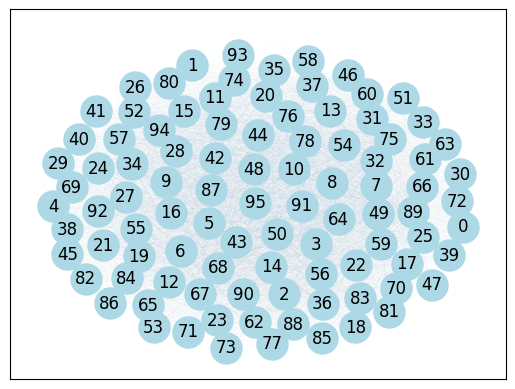

In [24]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# 加载注意力权重和 edge_index
attention_weights = torch.load(f'./vis_data/attn_weight_6.pt')
edge_index = torch.load(f'./vis_data/edge_index_6.pt')

# 使用之前提到的可视化方法
edge_index_np = edge_index.cpu().numpy()
attention_weights_np = attention_weights.cpu().numpy().squeeze()

G = nx.Graph()

# 假设节点编号从0开始连续编号
num_nodes = edge_index.max().item() + 1
G.add_nodes_from(range(num_nodes))

for i in range(edge_index_np.shape[1]):
    src = edge_index_np[0, i]
    dst = edge_index_np[1, i]
    weight = attention_weights_np[i]
    G.add_edge(src, dst, weight=weight)

pos = nx.spring_layout(G)
weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.show()


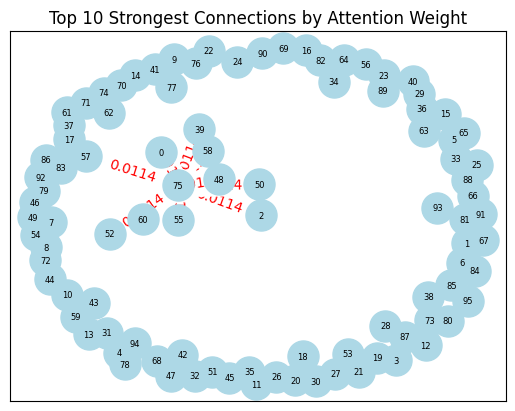

In [27]:
# 获取前10个最大权重的边索引
top_k = 10
top_indices = attention_weights_np.argsort()[-top_k:][::-1]  # 从大到小排序

top_edges = [(edge_index_np[0, i], edge_index_np[1, i]) for i in top_indices]
top_weights = [attention_weights_np[i] for i in top_indices]

# 创建一个新的图，仅包含前10条边
G_top = nx.Graph()
G_top.add_nodes_from(range(edge_index.max().item() + 1))
for (src, dst), weight in zip(top_edges, top_weights):
    G_top.add_edge(src, dst, weight=weight)

# 生成节点的布局
pos = nx.spring_layout(G_top)

# 绘制节点
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=500)

# 绘制带有颜色和宽度的边
edge_widths = [weight * 5 for weight in top_weights]
edge_colors = [plt.cm.Blues((weight - min(top_weights)) / (max(top_weights) - min(top_weights))) for weight in top_weights]
nx.draw_networkx_edges(G_top, pos, width=edge_widths, edge_color=edge_colors)

# 绘制边的权重标签
edge_labels = {(src, dst): f'{weight:.4f}' for (src, dst), weight in zip(top_edges, top_weights)}
nx.draw_networkx_edge_labels(G_top, pos, edge_labels=edge_labels, font_color='red')

# 绘制节点标签
nx.draw_networkx_labels(G_top, pos, font_size=6, font_color='black')

plt.title("Top 10 Strongest Connections by Attention Weight")
plt.show()